# User Overview Analysis

### Import Libraries and Modules

In [11]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the path to the src directory
src_dir = os.path.abspath(os.path.join(os.getcwd(), '..', 'src'))
sys.path.insert(0, src_dir)

if 'data_loader' in sys.modules:
    del sys.modules['data_loader']
if 'user_overview' in sys.modules:
    del sys.modules['user_overview']

from data_loader import DataLoader
from user_overview import UserOverview



### Load Data from PostgreSQL and create a UserOverview Object

In [12]:
loader = DataLoader()
df = loader.load_data("SELECT * FROM public.xdr_data")

cleaned_df = loader.clean_data(df)

df = cleaned_df

user_overview = UserOverview(df)

### Summary Statistics

In [3]:
statistics = user_overview.describe_dataset()
statistics

,Bearer Id,Start ms,End ms,Dur.(s),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.485060e+05,148935.000000,148935.000000,1.489350e+05,1.489350e+05,1.489350e+05,1.489350e+05,148935.000000,148935.000000,148935.000000,...,1.489350e+05,1.489350e+05,1.489350e+05,1.489350e+05,1.489350e+05,1.489350e+05,1.489350e+05,1.489350e+05,1.489350e+05,1.489350e+05
mean,1.014676e+19,499.246732,498.675442,1.048702e+05,2.082016e+14,4.188282e+10,4.849493e+13,108.224741,17.637235,13286.171390,...,1.163345e+07,1.100867e+07,1.162756e+07,1.100017e+07,4.220256e+08,8.289085e+06,4.211473e+08,8.263189e+06,4.111764e+07,4.546251e+08
std,2.893262e+18,288.555630,288.089136,8.106343e+04,1.522166e+10,2.447443e+12,2.242829e+13,536.316634,76.526150,23978.591234,...,6.711384e+06,6.345428e+06,6.724686e+06,6.358918e+06,2.439763e+08,4.782090e+06,2.431970e+08,4.768708e+06,1.127933e+07,2.441528e+08
min,6.917538e+18,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349883e+18,250.000000,251.000000,5.788350e+04,2.082014e+14,3.365130e+10,3.546071e+13,35.000000,3.000000,43.000000,...,5.831331e+06,5.516710e+06,5.779947e+06,5.474451e+06,2.104587e+08,4.130162e+06,2.102119e+08,4.145072e+06,3.321774e+07,2.430996e+08
50%,7.349883e+18,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366371e+10,3.572221e+13,54.000000,7.000000,63.000000,...,1.161638e+07,1.101329e+07,1.164269e+07,1.099563e+07,4.234208e+08,8.291222e+06,4.218716e+08,8.266089e+06,4.114101e+07,4.558708e+08
75%,1.304243e+19,749.000000,750.000000,1.327000e+05,2.082018e+14,3.368349e+10,8.611970e+13,108.224741,17.637235,19681.000000,...,1.744571e+07,1.651442e+07,1.747072e+07,1.650429e+07,6.331620e+08,1.243184e+07,6.316602e+08,1.238204e+07,4.903248e+07,6.656577e+08
max,1.318654e+19,999.000000,999.000000,1.859336e+06,2.082522e+14,8.823971e+14,9.900120e+13,96923.000000,7120.000000,378160.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08


### Top Handsets and Manufacturers


In [ ]:
user_overview.plot_top_handset_types()

In [ ]:
user_overview.plot_top_handset_manufacturers()

In [ ]:
user_overview.plot_top_handsets_per_manufacturer()

### Aggregates xDR

In [6]:
columns_to_aggregate = ['Bearer Id', 'Dur.(s)', 'Total UL (Bytes)', 'Total DL (Bytes)']

sessions = df.groupby('MSISDN/Number')[columns_to_aggregate].agg({
    'Bearer Id': 'count',
    'Dur.(s)': ['sum'],
    'Total UL (Bytes)': ['sum'],
    'Total DL (Bytes)': ['sum']
}).reset_index()


sessions


,MSISDN/Number,Bearer Id,Dur.(s),Total UL (Bytes),Total DL (Bytes)
,,count,sum,sum,sum
0,3.360100e+10,1,116720.0,36053108.0,8.426375e+08
1,3.360100e+10,1,181230.0,36104459.0,1.207552e+08
2,3.360100e+10,1,134969.0,39306820.0,5.566597e+08
3,3.360101e+10,1,49878.0,20327526.0,4.019932e+08
4,3.360101e+10,2,37104.0,94280527.0,1.363130e+09
...,...,...,...,...,...
106851,3.379000e+10,1,8810.0,26716429.0,6.879252e+08
106852,3.379000e+10,1,140988.0,35732243.0,4.445751e+08
106853,3.197021e+12,1,877385.0,37295915.0,1.948281e+08


In [5]:
mean_values = {
    'Mean Dur.(s)': round(float(sessions[('Dur.(s)', 'mean')].mean()), 2),
    'Mean Total UL (Bytes)': round(float(sessions[('Total UL (Bytes)', 'mean')].mean()), 2),
    'Mean Total DL (Bytes)': round(float(sessions[('Total DL (Bytes)', 'mean')].mean()), 2),
    'Mean Bearer Id Count': round(float(sessions[('Bearer Id', 'count')].mean()), 2)
}

print(mean_values)



{'Mean Dur.(s)': 102694.84, 'Mean Total UL (Bytes)': 41127096.65, 'Mean Total DL (Bytes)': 455184476.79, 'Mean Bearer Id Count': 1.39}


In [ ]:
# Aggregates per user
aggregates_per_users = df.groupby('MSISDN/Number').agg({
    # Total or average session duration
    'Dur.(s)': 'sum',
    
    # Summing up the columns listed in columns_to_sum
    **{col: 'sum' for col in columns_media}
}).reset_index()
                 

In [ ]:
# Add a new column for total application data volume (in Bytes) for each session per user
aggregates_per_users['Total Data Volume (Bytes)'] = aggregates_per_users[
    [col for col in columns_media if 'DL' in col or 'UL' in col]
].sum(axis=1)

# Display the aggregated DataFrame
aggregates_per_users.head()

## Decile top 5

In [ ]:
decile_aggregates = user_overview.segment_and_compute_decile()
print(decile_aggregates)

In [ ]:
# Plot
plt.figure(figsize=(10, 6))
bar_width = 0.25
opacity = 0.8

# Set positions for bars
index = range(len(decile_aggregates))

plt.bar(index, decile_aggregates['Total DL (Bytes)'], bar_width, alpha=opacity, color='b', label='Total DL (Bytes)')
plt.bar([i + bar_width for i in index], decile_aggregates['Total UL (Bytes)'], bar_width, alpha=opacity, color='g', label='Total UL (Bytes)')
plt.bar([i + 2 * bar_width for i in index], decile_aggregates['Total Data (Bytes)'], bar_width, alpha=opacity, color='r', label='Total Data (Bytes)')

plt.xlabel('Decile')
plt.ylabel('Bytes')
plt.title('Total Bytes by Decile')
plt.xticks([i + bar_width for i in index], decile_aggregates['Decile'])
plt.legend()

plt.tight_layout()
plt.show()

### Univariate Non-Graphical

In [ ]:
uvt_analysis = user_overview.univariate_analysis()
uvt_analysis

### Univariate Analysis Graphical

e:\Studies\tenx\w2\src\user_overview.py:202: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(quantitative_df[column], shade=True)


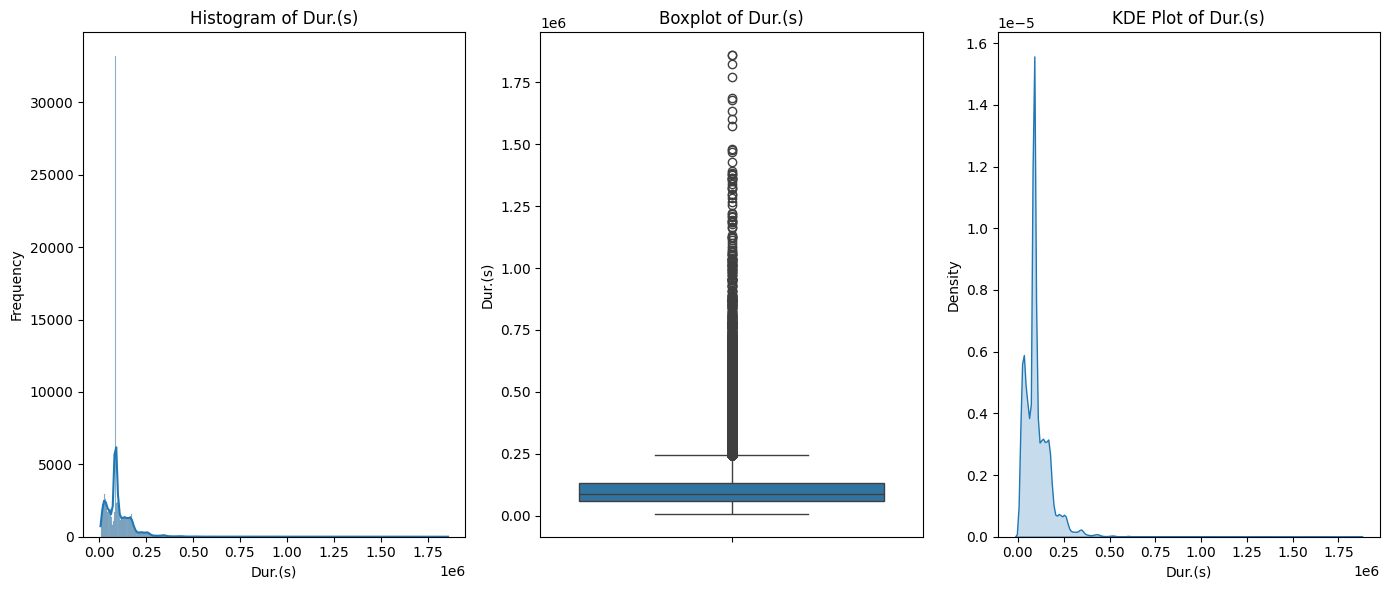

e:\Studies\tenx\w2\src\user_overview.py:202: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(quantitative_df[column], shade=True)


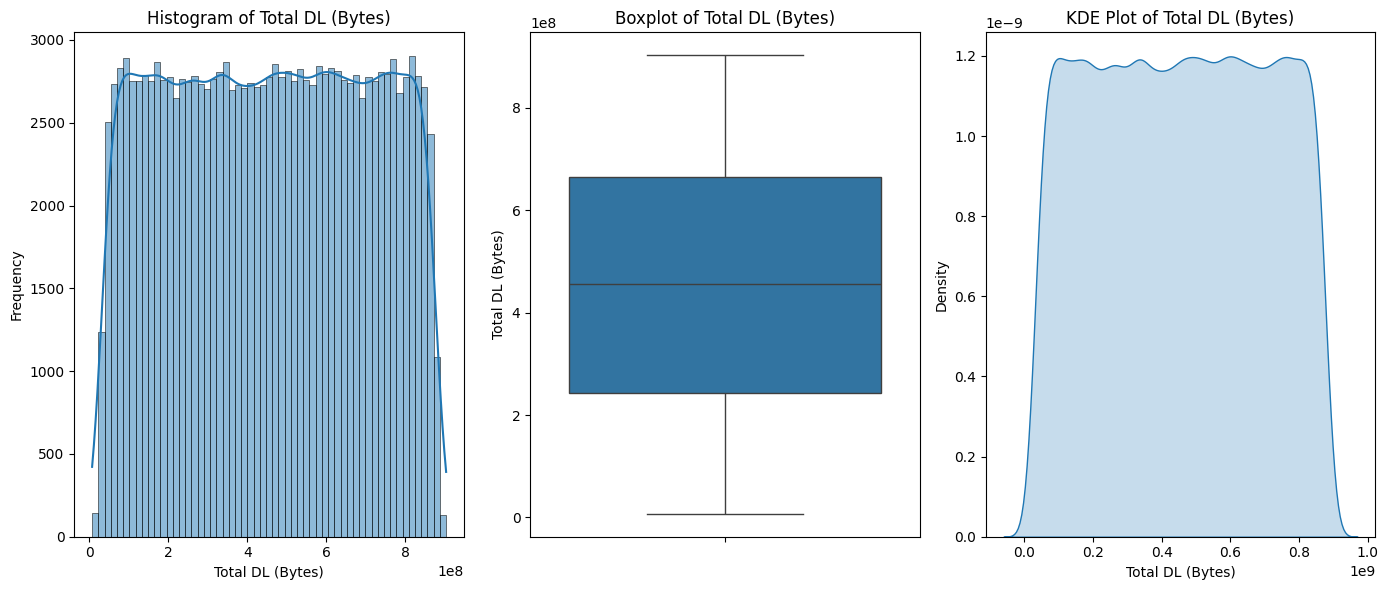

e:\Studies\tenx\w2\src\user_overview.py:202: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(quantitative_df[column], shade=True)


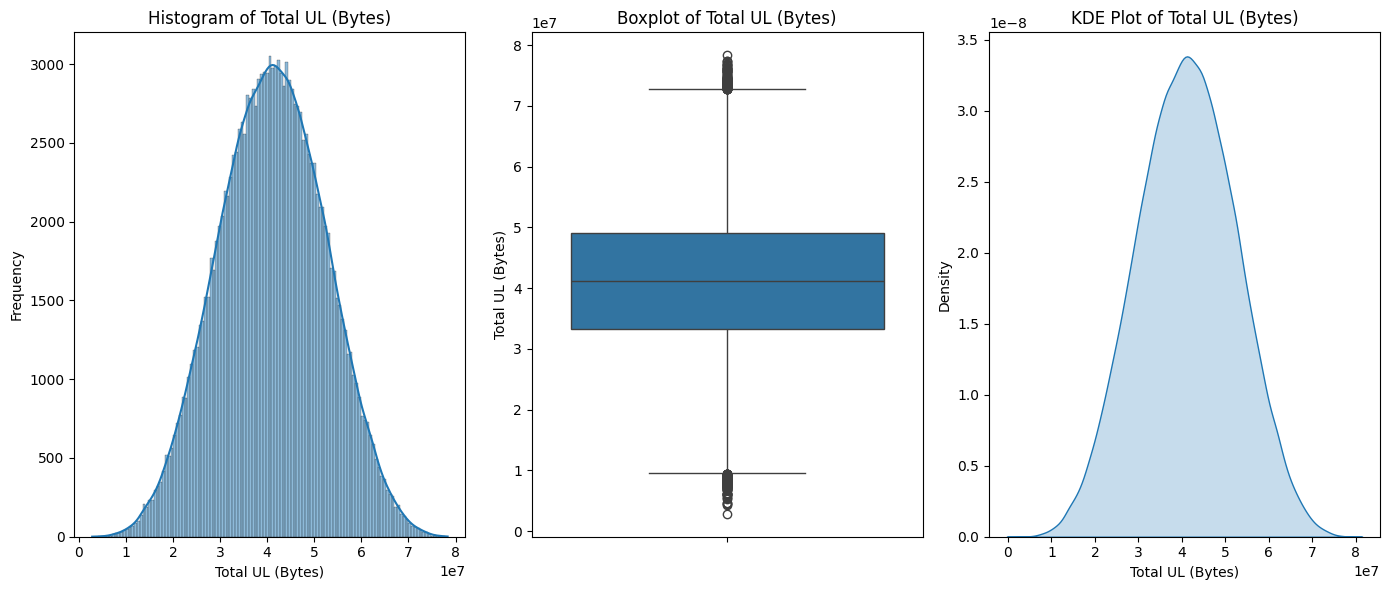

,Dur.(s),Total DL (Bytes),Total UL (Bytes)
0,1823652.0,308879636.0,36749741.0
1,1365104.0,653384965.0,53800391.0
2,1361762.0,279807335.0,27883638.0
3,1321509.0,846028530.0,43324218.0
4,1089009.0,569138589.0,38542814.0
...,...,...,...
149995,59587.0,819016468.0,53745392.0
149996,81230.0,574175259.0,57628851.0
149997,97970.0,666648844.0,39135081.0
149998,98249.0,592786405.0,34912224.0


In [13]:
user_overview.graphical_univariate_analysis()

### Bivariant Analysis

In [ ]:
bvt_analysis = user_overview.bivariate_analysis()
bvt_analysis

### Correlation Matrix

In [ ]:
corr_matrix = user_overview.plot_correlation_matrix()

### PCA Analysis

In [ ]:
pca_analysis = user_overview.pca_analysis()
pca_analysis